# Convolutional Neural Networks

## Project: Write an Algorithm for a Dog Identification App 

---

In this notebook, some template code has already been provided for you, and you will need to implement additional functionality to successfully complete this project. You will not need to modify the included code beyond what is requested. Sections that begin with **'(IMPLEMENTATION)'** in the header indicate that the following block of code will require additional functionality which you must provide. Instructions will be provided for each section, and the specifics of the implementation are marked in the code block with a 'TODO' statement. Please be sure to read the instructions carefully! 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the Jupyter Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to **File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut.  Markdown cells can be edited by double-clicking the cell to enter edit mode.

The rubric contains _optional_ "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. If you decide to pursue the "Stand Out Suggestions", you should include the code in this Jupyter notebook.



---
### Why We're Here 

In this notebook, you will make the first steps towards developing an algorithm that could be used as part of a mobile or web app.  At the end of this project, your code will accept any user-supplied image as input.  If a dog is detected in the image, it will provide an estimate of the dog's breed.  If a human is detected, it will provide an estimate of the dog breed that is most resembling.  The image below displays potential sample output of your finished project (... but we expect that each student's algorithm will behave differently!). 

![Sample Dog Output](images/sample_dog_output.png)

In this real-world setting, you will need to piece together a series of models to perform different tasks; for instance, the algorithm that detects humans in an image will be different from the CNN that infers dog breed.  There are many points of possible failure, and no perfect algorithm exists.  Your imperfect solution will nonetheless create a fun user experience!

### The Road Ahead

We break the notebook into separate steps.  Feel free to use the links below to navigate the notebook.

* [Step 0](#step0): Import Datasets
* [Step 1](#step1): Detect Humans
* [Step 2](#step2): Detect Dogs
* [Step 3](#step3): Create a CNN to Classify Dog Breeds (from Scratch)
* [Step 4](#step4): Create a CNN to Classify Dog Breeds (using Transfer Learning)
* [Step 5](#step5): Write your Algorithm
* [Step 6](#step6): Test Your Algorithm

---
<a id='step0'></a>
## Step 0: Import Datasets

Make sure that you've downloaded the required human and dog datasets:

**Note: if you are using the Udacity workspace, you *DO NOT* need to re-download these - they can be found in the `/data` folder as noted in the cell below.**

* Download the [dog dataset](https://s3-us-west-1.amazonaws.com/udacity-aind/dog-project/dogImages.zip).  Unzip the folder and place it in this project's home directory, at the location `/dog_images`. 

* Download the [human dataset](https://s3-us-west-1.amazonaws.com/udacity-aind/dog-project/lfw.zip).  Unzip the folder and place it in the home directory, at location `/lfw`.  

*Note: If you are using a Windows machine, you are encouraged to use [7zip](http://www.7-zip.org/) to extract the folder.*

In the code cell below, we save the file paths for both the human (LFW) dataset and dog dataset in the numpy arrays `human_files` and `dog_files`.

In [1]:
import numpy as np
from glob import glob

# load filenames for human and dog images
human_files = np.array(glob("/data/lfw/*/*"))
dog_files = np.array(glob("/data/dog_images/*/*/*"))

# print number of images in each dataset
print('There are %d total human images.' % len(human_files))
print('There are %d total dog images.' % len(dog_files))

There are 13233 total human images.
There are 8351 total dog images.


<a id='step1'></a>
## Step 1: Detect Humans

In this section, we use OpenCV's implementation of [Haar feature-based cascade classifiers](http://docs.opencv.org/trunk/d7/d8b/tutorial_py_face_detection.html) to detect human faces in images.  

OpenCV provides many pre-trained face detectors, stored as XML files on [github](https://github.com/opencv/opencv/tree/master/data/haarcascades).  We have downloaded one of these detectors and stored it in the `haarcascades` directory.  In the next code cell, we demonstrate how to use this detector to find human faces in a sample image.

Number of faces detected: 1


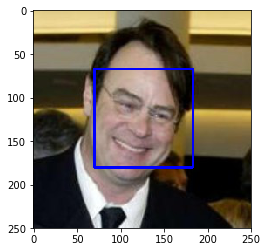

In [2]:
import cv2                
import matplotlib.pyplot as plt                        
%matplotlib inline                               

# extract pre-trained face detector
face_cascade = cv2.CascadeClassifier('haarcascades/haarcascade_frontalface_alt.xml')

# load color (BGR) image
img = cv2.imread(human_files[0])
# convert BGR image to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# find faces in image
faces = face_cascade.detectMultiScale(gray)

# print number of faces detected in the image
print('Number of faces detected:', len(faces))

# get bounding box for each detected face
for (x,y,w,h) in faces:
    # add bounding box to color image
    cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    
# convert BGR image to RGB for plotting
cv_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# display the image, along with bounding box
plt.imshow(cv_rgb)
plt.show()

Before using any of the face detectors, it is standard procedure to convert the images to grayscale.  The `detectMultiScale` function executes the classifier stored in `face_cascade` and takes the grayscale image as a parameter.  

In the above code, `faces` is a numpy array of detected faces, where each row corresponds to a detected face.  Each detected face is a 1D array with four entries that specifies the bounding box of the detected face.  The first two entries in the array (extracted in the above code as `x` and `y`) specify the horizontal and vertical positions of the top left corner of the bounding box.  The last two entries in the array (extracted here as `w` and `h`) specify the width and height of the box.

### Write a Human Face Detector

We can use this procedure to write a function that returns `True` if a human face is detected in an image and `False` otherwise.  This function, aptly named `face_detector`, takes a string-valued file path to an image as input and appears in the code block below.

In [3]:
# returns "True" if face is detected in image stored at img_path
def face_detector(img_path):
    img = cv2.imread(img_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray)
    return len(faces) > 0

### (IMPLEMENTATION) Assess the Human Face Detector

__Question 1:__ Use the code cell below to test the performance of the `face_detector` function.  
- What percentage of the first 100 images in `human_files` have a detected human face?  
- What percentage of the first 100 images in `dog_files` have a detected human face? 

Ideally, we would like 100% of human images with a detected face and 0% of dog images with a detected face.  You will see that our algorithm falls short of this goal, but still gives acceptable performance.  We extract the file paths for the first 100 images from each of the datasets and store them in the numpy arrays `human_files_short` and `dog_files_short`.

__Answer:__ 
(You can print out your results and/or write your percentages in this cell). See percentages below.

In [4]:
from tqdm import tqdm

human_files_short = human_files[:100]
dog_files_short = dog_files[:100]

#-#-# Do NOT modify the code above this line. #-#-#

## TODO: Test the performance of the face_detector algorithm 
## on the images in human_files_short and dog_files_short.

human_faces_true_counter = 0
dog_faces_true_counter = 0

for i in human_files_short:
    result = face_detector(i)
    if result == True:
        human_faces_true_counter += 1

human_faces_true_ratio = human_faces_true_counter/len(human_files_short)       

for i in dog_files_short:
    result = face_detector(i)
    if result == True:
        dog_faces_true_counter += 1

dog_faces_true_ratio = dog_faces_true_counter/len(dog_files_short)

print(f'face_detector identifies human faces in ~{human_faces_true_ratio*100}% of human images') 
print(f'face_detector identifies human faces in ~{dog_faces_true_ratio*100}% of dog images') 

face_detector identifies human faces in ~98.0% of human images
face_detector identifies human faces in ~17.0% of dog images


We suggest the face detector from OpenCV as a potential way to detect human images in your algorithm, but you are free to explore other approaches, especially approaches that make use of deep learning :).  Please use the code cell below to design and test your own face detection algorithm.  If you decide to pursue this _optional_ task, report performance on `human_files_short` and `dog_files_short`.

In [ ]:
### (Optional) 
### TODO: Test performance of anotherface detection algorithm.
### Feel free to use as many code cells as needed.

---
<a id='step2'></a>
## Step 2: Detect Dogs

In this section, we use a [pre-trained model](http://pytorch.org/docs/master/torchvision/models.html) to detect dogs in images.  

### Obtain Pre-trained VGG-16 Model

The code cell below downloads the VGG-16 model, along with weights that have been trained on [ImageNet](http://www.image-net.org/), a very large, very popular dataset used for image classification and other vision tasks.  ImageNet contains over 10 million URLs, each linking to an image containing an object from one of [1000 categories](https://gist.github.com/yrevar/942d3a0ac09ec9e5eb3a).  

In [5]:
import torch
import torchvision.models as models

# define VGG16 model
VGG16 = models.vgg16(pretrained=True)

# check if CUDA is available
use_cuda = torch.cuda.is_available()

# move model to GPU if CUDA is available
if use_cuda:
    VGG16 = VGG16.cuda()

Downloading: "https://download.pytorch.org/models/vgg16-397923af.pth" to /root/.torch/models/vgg16-397923af.pth
100%|██████████| 553433881/553433881 [00:09<00:00, 58135871.32it/s]


Given an image, this pre-trained VGG-16 model returns a prediction (derived from the 1000 possible categories in ImageNet) for the object that is contained in the image.

### (IMPLEMENTATION) Making Predictions with a Pre-trained Model

In the next code cell, you will write a function that accepts a path to an image (such as `'dogImages/train/001.Affenpinscher/Affenpinscher_00001.jpg'`) as input and returns the index corresponding to the ImageNet class that is predicted by the pre-trained VGG-16 model.  The output should always be an integer between 0 and 999, inclusive.

Before writing the function, make sure that you take the time to learn  how to appropriately pre-process tensors for pre-trained models in the [PyTorch documentation](http://pytorch.org/docs/stable/torchvision/models.html).

In [6]:
from PIL import Image
import torchvision.transforms as transforms

def VGG16_predict(img_path):
    '''
    Use pre-trained VGG-16 model to obtain index corresponding to 
    predicted ImageNet class for image at specified path
    
    Args:
        img_path: path to an image
        
    Returns:
        Index corresponding to VGG-16 model's prediction
    '''
    
    ## TODO: Complete the function.
    ## Load and pre-process an image from the given img_path
    ## Return the *index* of the predicted class for that image

    img_transform = transforms.Compose([
        transforms.RandomResizedCrop(224), 
        transforms.ToTensor()
    ])
    
    img = Image.open(img_path)
    img = img_transform(img)
    img = img.unsqueeze(0)
    VGG16.eval()
    if use_cuda:
        img = img.cuda()
    with torch.no_grad():
        prediction = VGG16(img)
#     prediction = prediction.data.numpy().argmax()
    prediction = prediction.cpu().numpy().argmax()
    
    return prediction # predicted class index

### (IMPLEMENTATION) Write a Dog Detector

While looking at the [dictionary](https://gist.github.com/yrevar/942d3a0ac09ec9e5eb3a), you will notice that the categories corresponding to dogs appear in an uninterrupted sequence and correspond to dictionary keys 151-268, inclusive, to include all categories from `'Chihuahua'` to `'Mexican hairless'`.  Thus, in order to check to see if an image is predicted to contain a dog by the pre-trained VGG-16 model, we need only check if the pre-trained model predicts an index between 151 and 268 (inclusive).

Use these ideas to complete the `dog_detector` function below, which returns `True` if a dog is detected in an image (and `False` if not).

In [7]:
### returns "True" if a dog is detected in the image stored at img_path
def dog_detector(img_path):
    ## TODO: Complete the function.
    dog_indices = list(range(151, 269))
    result = int(VGG16_predict(img_path))
    if result in dog_indices:
        return True
    else:
        return False

### (IMPLEMENTATION) Assess the Dog Detector

__Question 2:__ Use the code cell below to test the performance of your `dog_detector` function.  
- What percentage of the images in `human_files_short` have a detected dog?  
- What percentage of the images in `dog_files_short` have a detected dog?

__Answer:__ 
1) 1% 
2) 74%


In [8]:
### TODO: Test the performance of the dog_detector function
### on the images in human_files_short and dog_files_short.

human_true_counter = 0
dog_true_counter = 0

for i in human_files_short:
    result = dog_detector(i)
    if result == True:
        human_true_counter += 1

human_true_ratio = human_true_counter/len(human_files_short)       

for i in dog_files_short:
    result = dog_detector(i)
    if result == True:
        dog_true_counter += 1

dog_true_ratio = dog_true_counter/len(dog_files_short)

print(f'VGG-based dog_detector identifies ~{human_true_ratio*100}% of human images as dogs') 
print(f'VGG-based dog_detector identifies ~{dog_true_ratio*100}% of dog images as dogs') 

VGG-based dog_detector identifies ~1.0% of human images as dogs
VGG-based dog_detector identifies ~74.0% of dog images as dogs


We suggest VGG-16 as a potential network to detect dog images in your algorithm, but you are free to explore other pre-trained networks (such as [Inception-v3](http://pytorch.org/docs/master/torchvision/models.html#inception-v3), [ResNet-50](http://pytorch.org/docs/master/torchvision/models.html#id3), etc).  Please use the code cell below to test other pre-trained PyTorch models.  If you decide to pursue this _optional_ task, report performance on `human_files_short` and `dog_files_short`.

In [ ]:
### (Optional) 
### TODO: Report the performance of another pre-trained network.
### Feel free to use as many code cells as needed.

---
<a id='step3'></a>
## Step 3: Create a CNN to Classify Dog Breeds (from Scratch)

Now that we have functions for detecting humans and dogs in images, we need a way to predict breed from images.  In this step, you will create a CNN that classifies dog breeds.  You must create your CNN _from scratch_ (so, you can't use transfer learning _yet_!), and you must attain a test accuracy of at least 10%.  In Step 4 of this notebook, you will have the opportunity to use transfer learning to create a CNN that attains greatly improved accuracy.

We mention that the task of assigning breed to dogs from images is considered exceptionally challenging.  To see why, consider that *even a human* would have trouble distinguishing between a Brittany and a Welsh Springer Spaniel.  

Brittany | Welsh Springer Spaniel
- | - 
<img src="images/Brittany_02625.jpg" width="100"> | <img src="images/Welsh_springer_spaniel_08203.jpg" width="200">

It is not difficult to find other dog breed pairs with minimal inter-class variation (for instance, Curly-Coated Retrievers and American Water Spaniels).  

Curly-Coated Retriever | American Water Spaniel
- | -
<img src="images/Curly-coated_retriever_03896.jpg" width="200"> | <img src="images/American_water_spaniel_00648.jpg" width="200">


Likewise, recall that labradors come in yellow, chocolate, and black.  Your vision-based algorithm will have to conquer this high intra-class variation to determine how to classify all of these different shades as the same breed.  

Yellow Labrador | Chocolate Labrador | Black Labrador
- | -
<img src="images/Labrador_retriever_06457.jpg" width="150"> | <img src="images/Labrador_retriever_06455.jpg" width="240"> | <img src="images/Labrador_retriever_06449.jpg" width="220">

We also mention that random chance presents an exceptionally low bar: setting aside the fact that the classes are slightly imabalanced, a random guess will provide a correct answer roughly 1 in 133 times, which corresponds to an accuracy of less than 1%.  

Remember that the practice is far ahead of the theory in deep learning.  Experiment with many different architectures, and trust your intuition.  And, of course, have fun!

### (IMPLEMENTATION) Specify Data Loaders for the Dog Dataset

Use the code cell below to write three separate [data loaders](http://pytorch.org/docs/stable/data.html#torch.utils.data.DataLoader) for the training, validation, and test datasets of dog images (located at `dog_images/train`, `dog_images/valid`, and `dog_images/test`, respectively).  You may find [this documentation on custom datasets](http://pytorch.org/docs/stable/torchvision/datasets.html) to be a useful resource.  If you are interested in augmenting your training and/or validation data, check out the wide variety of [transforms](http://pytorch.org/docs/stable/torchvision/transforms.html?highlight=transform)!

In [9]:
#Check Directories
import os
print(os.listdir("/data"))
print(os.listdir("/data/dog_images"))

['dog_images', 'lfw', 'bottleneck_features']
['train', 'test', 'valid']


In [10]:
#Walk through all directories and files in "dog_images" and gather size info for each image to find the smallest image dimension
import PIL

image_size_dict = {}

for (root, dirs, files) in os.walk('/data/dog_images', topdown=True):
    if len(files) > 0:
        print('Now iterating through files in', root)
        for i in files:
#             print(i)
            image = PIL.Image.open(f'{root}/{i}')
            width, height = image.size
            min_dimension = min([width, height])
#             print(min_dimension)
            image_size_dict[i] = min_dimension


Now iterating through files in /data/dog_images/train/103.Mastiff
Now iterating through files in /data/dog_images/train/059.Doberman_pinscher
Now iterating through files in /data/dog_images/train/055.Curly-coated_retriever
Now iterating through files in /data/dog_images/train/031.Borzoi
Now iterating through files in /data/dog_images/train/024.Bichon_frise
Now iterating through files in /data/dog_images/train/049.Chinese_crested
Now iterating through files in /data/dog_images/train/067.Finnish_spitz
Now iterating through files in /data/dog_images/train/130.Welsh_springer_spaniel
Now iterating through files in /data/dog_images/train/019.Bedlington_terrier
Now iterating through files in /data/dog_images/train/115.Papillon
Now iterating through files in /data/dog_images/train/126.Saint_bernard
Now iterating through files in /data/dog_images/train/013.Australian_terrier
Now iterating through files in /data/dog_images/train/116.Parson_russell_terrier
Now iterating through files in /data/dog

In [11]:
print('Smallest image dimension is', image_size_dict[min(image_size_dict, key=image_size_dict.get)], 'pixels')

Smallest image dimension is 105 pixels


In [12]:
#Gather classes and store in dictionary
classes_dict = {}

breed_list = os.listdir('/data/dog_images/train')
breed_list_len = len(breed_list)

for i in range(breed_list_len):
    classes_dict[i] = breed_list[i]
    
print(classes_dict)

{0: '103.Mastiff', 1: '059.Doberman_pinscher', 2: '055.Curly-coated_retriever', 3: '031.Borzoi', 4: '024.Bichon_frise', 5: '049.Chinese_crested', 6: '067.Finnish_spitz', 7: '130.Welsh_springer_spaniel', 8: '019.Bedlington_terrier', 9: '115.Papillon', 10: '126.Saint_bernard', 11: '013.Australian_terrier', 12: '116.Parson_russell_terrier', 13: '107.Norfolk_terrier', 14: '133.Yorkshire_terrier', 15: '032.Boston_terrier', 16: '108.Norwegian_buhund', 17: '028.Bluetick_coonhound', 18: '066.Field_spaniel', 19: '129.Tibetan_mastiff', 20: '005.Alaskan_malamute', 21: '102.Manchester_terrier', 22: '034.Boxer', 23: '068.Flat-coated_retriever', 24: '089.Irish_wolfhound', 25: '104.Miniature_schnauzer', 26: '035.Boykin_spaniel', 27: '080.Greater_swiss_mountain_dog', 28: '007.American_foxhound', 29: '112.Nova_scotia_duck_tolling_retriever', 30: '025.Black_and_tan_coonhound', 31: '072.German_shorthaired_pointer', 32: '062.English_setter', 33: '029.Border_collie', 34: '045.Cardigan_welsh_corgi', 35: '10

In [13]:
print(f'There are {len(classes_dict.keys())} dog breeds in the data set.')

There are 133 dog breeds in the data set.


In [14]:
import os
from torchvision import datasets
import torchvision.transforms as transforms
import torchvision.datasets as datasets
from torch.utils.data.sampler import SubsetRandomSampler

### TODO: Write data loaders for training, validation, and test sets
## Specify appropriate transforms, and batch_sizes

### CUDA check
train_on_gpu = torch.cuda.is_available()

if not train_on_gpu:
    print('CUDA is not available. Training on CPU...')
else:
    print('CUDA is available. Training on GPU...')
    
### Data Loading
# number of subprocesses to use for data loading
num_workers = 0
# how many samples per batch to load
batch_size = 64

train_transform = transforms.Compose([
    transforms.Resize(size=256),
    transforms.CenterCrop(224),
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(15),
    transforms.ToTensor(),
    transforms.Normalize((0.485, 0.456, 0.406), (0.229, 0.224, 0.225)),
])

valid_test_transform = transforms.Compose([
    transforms.Resize(size=256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize((0.485, 0.456, 0.406), (0.229, 0.224, 0.225)),
])


train_dataset = datasets.ImageFolder("/data/dog_images/train", transform=train_transform)
valid_dataset = datasets.ImageFolder("/data/dog_images/valid", transform=valid_test_transform)
test_dataset = datasets.ImageFolder("/data/dog_images/test", transform=valid_test_transform)

train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size, 
    num_workers=num_workers, shuffle=True)
valid_loader = torch.utils.data.DataLoader(valid_dataset, batch_size=batch_size, 
    num_workers=num_workers, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=batch_size, 
    num_workers=num_workers)

CUDA is available. Training on GPU...


**Question 3:** Describe your chosen procedure for preprocessing the data. 
- How does your code resize the images (by cropping, stretching, etc)?  What size did you pick for the input tensor, and why?
- Did you decide to augment the dataset?  If so, how (through translations, flips, rotations, etc)?  If not, why not?


**Answer**: The code performs a RandomResizedCrop. The smallest image dimension encountered in the data set is 105. I didn't want to crop all images below this value since key image info may be lost. So I cropped to 224 x 224 (same as VGG). I also did a random flip and random rotation in the datasets.

### (IMPLEMENTATION) Model Architecture

Create a CNN to classify dog breed.  Use the template in the code cell below.

In [15]:
# Assess dimensions of each potential layer, in order to determine input dim in final nn.Linear layer
def conv_out_size(in_vol_size, in_depth, num_filters, filter_size, stride, padding, pool=False, pool_filter=0, pool_stride=0):
    '''MY FUNCTION!
       pool_params = [pool_filter, pool_stride] | for MAX POOL
       in_vol_size = dim of one side of input (need symmetric input)
       filter_size = size of filter
       num_filters = output depth
       pytorch conv2d ref = nn.Conv2d(in_channels, out_channels, kernel_size, stride=1, padding=0)
    '''
    
    out_size = (in_vol_size-filter_size+2*padding)/stride+1
    out_dims = (out_size, out_size, num_filters)
    out_params = (filter_size * filter_size * num_filters * in_depth) + num_filters
    
    if pool == True:
        out_size = ((out_size - pool_filter) / pool_stride) + 1
        out_dims = (out_size, out_size, num_filters)
        return out_dims, out_params, f'Output Size: {out_dims}, Output Parameters: {out_params}'
    
    else:
        return out_dims, out_params, f'Output Size: {out_dims}, Output Parameters: {out_params}'

# OPTION 1
# Input impage size = 224,224,3
# self.conv1 = nn.Conv2d(3, 32, 3, padding=1)
# self.conv2 = nn.Conv2d(32, 64, 3, padding=1)
# self.conv3 = nn.Conv2d(64, 128, 3, padding=1)
# self.conv4 = nn.Conv2d(128, 256, 3, padding=1)
# self.conv5 = nn.Conv2d(256, 512, 3, padding=1)
# nn.MaxPool2d(2, 2)

# OPTION 2
# Input impage size = 100,100,3
# self.conv1 = nn.Conv2d(3, 16, 3, padding=1)
# self.conv2 = nn.Conv2d(16, 32, 3, padding=1)
# self.conv3 = nn.Conv2d(32, 64, 3, padding=1)
# self.conv4 = nn.Conv2d(64, 128, 3, padding=1)
# nn.MaxPool2d(2, 2)

dim1, params1, _ = conv_out_size(224, 3, 32, 3, 1, 1, pool=True, pool_filter=2, pool_stride=2)
dim2, params2, _ = conv_out_size(dim1[0], 32, 64, 3, 1, 1, pool=True, pool_filter=2, pool_stride=2)
dim3, params3, _ = conv_out_size(dim2[0], 64, 128, 3, 1, 1, pool=True, pool_filter=2, pool_stride=2)
dim4, params4, _ = conv_out_size(dim3[0], 128, 256, 3, 1, 1, pool=True, pool_filter=2, pool_stride=2)
# dim5, params5, _ = conv_out_size(dim4[0], 256, 512, 3, 1, 1, pool=True, pool_filter=2, pool_stride=2)
# params = params1 + params2
print(dim1)
print(params1)
print(dim2)
print(params2)
print(dim3)
print(params3)
print(dim4)
print(params4)
# print(dim5)
# print(params5)
# print('Total params',params)



(112.0, 112.0, 32)
896
(56.0, 56.0, 64)
18496
(28.0, 28.0, 128)
73856
(14.0, 14.0, 256)
295168


In [16]:
import torch.nn as nn
import torch.nn.functional as F

# define the CNN architecture
class Net(nn.Module):
    ### TODO: choose an architecture, and complete the class
    def __init__(self):
        super(Net, self).__init__()
        ## Define layers of a CNN
        self.conv1 = nn.Conv2d(3, 32, 3, padding=1)
        self.conv2 = nn.Conv2d(32, 64, 3, padding=1)
        self.conv3 = nn.Conv2d(64, 128, 3, padding=1)
        self.conv4 = nn.Conv2d(128, 256, 3, padding=1)
#         self.conv4 = nn.Conv2d(128, 256, 3, padding=1)
#         self.conv5 = nn.Conv2d(256, 512, 3, padding=1)
        self.bn1 = nn.BatchNorm2d(32)
        self.bn2 = nn.BatchNorm2d(64)
        self.bn3 = nn.BatchNorm2d(128)
        self.bn4 = nn.BatchNorm2d(256)
#         self.bn5 = nn.BatchNorm2d(512)
        self.pool = nn.MaxPool2d(2,2)
        self.dropout = nn.Dropout(0.2)
        self.fc1 = nn.Linear(14*14*256, 1024)
#         self.fc2 = nn.Linear(2048, 1024)
        self.fc2 = nn.Linear(1024, 512)
        self.fc3 = nn.Linear(512, 133)
    
    def forward(self, x):
        ## Define forward behavior
        x = self.pool(F.relu(self.bn1(self.conv1(x))))
        x = self.dropout(x)
        x = self.pool(F.relu(self.bn2(self.conv2(x))))
        x = self.dropout(x)
        x = self.pool(F.relu(self.bn3(self.conv3(x))))
        x = self.dropout(x)
        x = self.pool(F.relu(self.bn4(self.conv4(x))))
        x = self.dropout(x)
#         x = self.bn1(self.pool(F.relu(self.conv1(x))))
#         x = self.dropout(x)
#         x = self.bn2(self.pool(F.relu(self.conv2(x))))
#         x = self.dropout(x)
#         x = self.bn3(self.pool(F.relu(self.conv3(x))))
#         x = self.dropout(x)
#         x = self.bn4(self.pool(F.relu(self.conv4(x))))
#         x = self.dropout(x)
#         x = self.bn5(self.pool(F.relu(self.conv5(x))))
#         x = self.dropout(x)
#         print(x.shape)
        x = x.view(-1, 14*14*256)
        x = self.dropout(x)
        x = F.relu(self.fc1(x))
        x = self.dropout(x)
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
#         x = self.dropout(x)
#         x = F.relu(self.fc3(x))
        return x

#-#-# You so NOT have to modify the code below this line. #-#-#

# instantiate the CNN
model_scratch = Net()

# move tensors to GPU if CUDA is available
if use_cuda:
    model_scratch.cuda()

__Question 4:__ Outline the steps you took to get to your final CNN architecture and your reasoning at each step.  

__Answer:__ I based the architecture off of VGG16... decreasing height and width at each layer, but increasing depth by ~ a factor of 2. I determined the dimensions of each layer using a custom function. The last layer is a fully connected layer with 133 classes.

### (IMPLEMENTATION) Specify Loss Function and Optimizer

Use the next code cell to specify a [loss function](http://pytorch.org/docs/stable/nn.html#loss-functions) and [optimizer](http://pytorch.org/docs/stable/optim.html).  Save the chosen loss function as `criterion_scratch`, and the optimizer as `optimizer_scratch` below.

In [17]:
import torch.optim as optim

### TODO: select loss function
criterion_scratch = nn.CrossEntropyLoss()

### TODO: select optimizer
optimizer_scratch = optim.SGD(model_scratch.parameters(), lr=0.05)

In [18]:
#set loaders

loaders_scratch = {
    'train': train_loader,
    'valid': valid_loader,
    'test': test_loader
}
loaders_scratch

{'train': <torch.utils.data.dataloader.DataLoader at 0x7f242807d358>,
 'valid': <torch.utils.data.dataloader.DataLoader at 0x7f242807d278>,
 'test': <torch.utils.data.dataloader.DataLoader at 0x7f242807d2b0>}

### (IMPLEMENTATION) Train and Validate the Model

Train and validate your model in the code cell below.  [Save the final model parameters](http://pytorch.org/docs/master/notes/serialization.html) at filepath `'model_scratch.pt'`.

In [19]:
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True

def train(n_epochs, loaders, model, optimizer, criterion, use_cuda, save_path):
    """returns trained model"""
    # initialize tracker for minimum validation loss
    valid_loss_min = np.Inf 
    
    for epoch in range(1, n_epochs+1):
        print('Now in epoch ', epoch, '...')
        # initialize variables to monitor training and validation loss
        train_loss = 0.0
        valid_loss = 0.0
        
        ###################
        # train the model #
        ###################
        model.train()
        for batch_idx, (data, target) in enumerate(loaders['train']):
            # move to GPU
            if use_cuda:
                data, target = data.cuda(), target.cuda()
            ## find the loss and update the model parameters accordingly
            ## record the average training loss, using something like
            ## train_loss = train_loss + ((1 / (batch_idx + 1)) * (loss.data - train_loss))
            optimizer.zero_grad()
            output = model(data)
            loss = criterion(output, target)
            loss.backward()
            optimizer.step()
#             train_loss += loss.item()*data.size(0)
            train_loss = train_loss + ((1 / (batch_idx + 1)) * (loss.data - train_loss))
    
        ######################    
        # validate the model #
        ######################
        model.eval()
        for batch_idx, (data, target) in enumerate(loaders['valid']):
            # move to GPU
            if use_cuda:
                data, target = data.cuda(), target.cuda()
            ## update the average validation loss
            
            
            
            optimizer.zero_grad()
            
            
            
            with torch.no_grad():
                output = model(data)
            loss = criterion(output, target)
#             valid_loss += loss.item()*data.size(0)
            valid_loss = valid_loss + ((1 / (batch_idx + 1)) * (loss.data - valid_loss))

#         train_loss = train_loss/len(loaders['train'])
#         valid_loss = valid_loss/len(loaders['valid'])
    
        # print training/validation statistics 
        print('Epoch: {} \tTraining Loss: {:.6f} \tValidation Loss: {:.6f}'.format(
            epoch, 
            train_loss,
            valid_loss
            ))
        
        ## TODO: save the model if validation loss has decreased
        if valid_loss <= valid_loss_min:
            print('Validation loss decreased ({:.6f} --> {:.6f}).  Saving model ...'.format(
            valid_loss_min,
            valid_loss))
            torch.save(model.state_dict(), 'model_scratch.pt')
            valid_loss_min = valid_loss
        
    # return trained model
    return model


# train the model
model_scratch = train(25, loaders_scratch, model_scratch, optimizer_scratch, 
                      criterion_scratch, use_cuda, 'model_scratch.pt')

# load the model that got the best validation accuracy
model_scratch.load_state_dict(torch.load('model_scratch.pt'))

Now in epoch  1 ...
Epoch: 1 	Training Loss: 4.881628 	Validation Loss: 4.867357
Validation loss decreased (inf --> 4.867357).  Saving model ...
Now in epoch  2 ...
Epoch: 2 	Training Loss: 4.773715 	Validation Loss: 4.819668
Validation loss decreased (4.867357 --> 4.819668).  Saving model ...
Now in epoch  3 ...
Epoch: 3 	Training Loss: 4.597115 	Validation Loss: 4.656600
Validation loss decreased (4.819668 --> 4.656600).  Saving model ...
Now in epoch  4 ...
Epoch: 4 	Training Loss: 4.467999 	Validation Loss: 4.491435
Validation loss decreased (4.656600 --> 4.491435).  Saving model ...
Now in epoch  5 ...
Epoch: 5 	Training Loss: 4.350633 	Validation Loss: 4.424088
Validation loss decreased (4.491435 --> 4.424088).  Saving model ...
Now in epoch  6 ...
Epoch: 6 	Training Loss: 4.235861 	Validation Loss: 4.534289
Now in epoch  7 ...
Epoch: 7 	Training Loss: 4.129731 	Validation Loss: 4.500051
Now in epoch  8 ...
Epoch: 8 	Training Loss: 4.028242 	Validation Loss: 4.729065
Now in epoch

### (IMPLEMENTATION) Test the Model

Try out your model on the test dataset of dog images.  Use the code cell below to calculate and print the test loss and accuracy.  Ensure that your test accuracy is greater than 10%.

In [20]:
def test(loaders, model, criterion, use_cuda):

    # monitor test loss and accuracy
    test_loss = 0.
    correct = 0.
    total = 0.

    model.eval()
    for batch_idx, (data, target) in enumerate(loaders['test']):
        # move to GPU
        if use_cuda:
            data, target = data.cuda(), target.cuda()
        # forward pass: compute predicted outputs by passing inputs to the model
        output = model(data)
        # calculate the loss
        loss = criterion(output, target)
        # update average test loss 
        test_loss = test_loss + ((1 / (batch_idx + 1)) * (loss.data - test_loss))
        # convert output probabilities to predicted class
        pred = output.data.max(1, keepdim=True)[1]
        # compare predictions to true label
        correct += np.sum(np.squeeze(pred.eq(target.data.view_as(pred))).cpu().numpy())
        total += data.size(0)
            
    print('Test Loss: {:.6f}\n'.format(test_loss))

    print('\nTest Accuracy: %2d%% (%2d/%2d)' % (
        100. * correct / total, correct, total))

# call test function    
test(loaders_scratch, model_scratch, criterion_scratch, use_cuda)

Test Loss: 3.913070


Test Accuracy: 14% (119/836)


---
<a id='step4'></a>
## Step 4: Create a CNN to Classify Dog Breeds (using Transfer Learning)

You will now use transfer learning to create a CNN that can identify dog breed from images.  Your CNN must attain at least 60% accuracy on the test set.

### (IMPLEMENTATION) Specify Data Loaders for the Dog Dataset

Use the code cell below to write three separate [data loaders](http://pytorch.org/docs/master/data.html#torch.utils.data.DataLoader) for the training, validation, and test datasets of dog images (located at `dogImages/train`, `dogImages/valid`, and `dogImages/test`, respectively). 

If you like, **you are welcome to use the same data loaders from the previous step**, when you created a CNN from scratch.

In [122]:
## TODO: Specify data loaders

## Specify appropriate transforms, and batch_sizes

### CUDA check
train_on_gpu = torch.cuda.is_available()

if not train_on_gpu:
    print('CUDA is not available. Training on CPU...')
else:
    print('CUDA is available. Training on GPU...')
    
### Data Loading
# number of subprocesses to use for data loading
num_workers = 0
# how many samples per batch to load
batch_size = 64

train_transform = transforms.Compose([
    transforms.Resize(size=320),
    transforms.CenterCrop(299),
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(20),
    transforms.ToTensor(),
    transforms.Normalize((0.485, 0.456, 0.406), (0.229, 0.224, 0.225)),
])

valid_test_transform = transforms.Compose([
    transforms.Resize(size=320),
    transforms.CenterCrop(299),
    transforms.ToTensor(),
    transforms.Normalize((0.485, 0.456, 0.406), (0.229, 0.224, 0.225)),
])


train_dataset = datasets.ImageFolder("/data/dog_images/train", transform=train_transform)
valid_dataset = datasets.ImageFolder("/data/dog_images/valid", transform=valid_test_transform)
test_dataset = datasets.ImageFolder("/data/dog_images/test", transform=valid_test_transform)

train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size, 
    num_workers=num_workers, shuffle=True)
valid_loader = torch.utils.data.DataLoader(valid_dataset, batch_size=batch_size, 
    num_workers=num_workers, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=batch_size, 
    num_workers=num_workers)

CUDA is available. Training on GPU...


### (IMPLEMENTATION) Model Architecture

Use transfer learning to create a CNN to classify dog breed.  Use the code cell below, and save your initialized model as the variable `model_transfer`.

In [123]:
import torchvision.models as models
import torch.nn as nn

## TODO: Specify model architecture 
# Load the pretrained model from pytorch
# model_transfer = models.vgg16(pretrained=True)
model_transfer = models.inception_v3(pretrained=True)

# print out the model structure
print(model_transfer)
    
# print(model_transfer.classifier[6].out_features) 

Inception3(
  (Conv2d_1a_3x3): BasicConv2d(
    (conv): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), bias=False)
    (bn): BatchNorm2d(32, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  )
  (Conv2d_2a_3x3): BasicConv2d(
    (conv): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), bias=False)
    (bn): BatchNorm2d(32, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  )
  (Conv2d_2b_3x3): BasicConv2d(
    (conv): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (bn): BatchNorm2d(64, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  )
  (Conv2d_3b_1x1): BasicConv2d(
    (conv): Conv2d(64, 80, kernel_size=(1, 1), stride=(1, 1), bias=False)
    (bn): BatchNorm2d(80, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  )
  (Conv2d_4a_3x3): BasicConv2d(
    (conv): Conv2d(80, 192, kernel_size=(3, 3), stride=(1, 1), bias=False)
    (bn): BatchNorm2d(192, eps=0.001, momentum=0.1, affine=True, t

In [98]:
print(model_transfer.fc.in_features) 
print(model_transfer.fc.out_features) 

2048
1000


In [42]:
help(model_transfer)

Help on Inception3 in module torchvision.models.inception object:

class Inception3(torch.nn.modules.module.Module)
 |  Base class for all neural network modules.
 |  
 |  Your models should also subclass this class.
 |  
 |  Modules can also contain other Modules, allowing to nest them in
 |  a tree structure. You can assign the submodules as regular attributes::
 |  
 |      import torch.nn as nn
 |      import torch.nn.functional as F
 |  
 |      class Model(nn.Module):
 |          def __init__(self):
 |              super(Model, self).__init__()
 |              self.conv1 = nn.Conv2d(1, 20, 5)
 |              self.conv2 = nn.Conv2d(20, 20, 5)
 |  
 |          def forward(self, x):
 |             x = F.relu(self.conv1(x))
 |             return F.relu(self.conv2(x))
 |  
 |  Submodules assigned in this way will be registered, and will have their
 |  parameters converted too when you call `.cuda()`, etc.
 |  
 |  Method resolution order:
 |      Inception3
 |      torch.nn.modules.mo

In [125]:
# Freeze training for all layers except AuxLogits and final fc

params_to_update = []

for name, module in model_transfer.named_children():
    if name == 'AuxLogits':
#         for param in module.conv0.parameters():
#             param.requires_grad = False
#         for param in module.conv1.parameters():
#             param.requires_grad = False
        for param in module.parameters():
            params_to_update.append(param)
    elif name == 'fc':
        for param in module.parameters():
            params_to_update.append(param)
    elif name == 'Mixed_7a':
        for param in module.parameters():
            params_to_update.append(param)
    elif name == 'Mixed_7b':
        for param in module.parameters():
            params_to_update.append(param)
    elif name == 'Mixed_7c':
        for param in module.parameters():
            params_to_update.append(param)
    else:
        for param in module.parameters():
            param.requires_grad = False
            
params_to_update

[Parameter containing:
 tensor([[[[-6.7129e-02]],
 
          [[-2.4037e-03]],
 
          [[ 1.6222e-02]],
 
          ...,
 
          [[-1.2233e-02]],
 
          [[-2.3126e-02]],
 
          [[ 2.4344e-02]]],
 
 
         [[[ 3.0315e-02]],
 
          [[ 2.1907e-02]],
 
          [[-8.2309e-03]],
 
          ...,
 
          [[-7.3981e-03]],
 
          [[ 6.5920e-02]],
 
          [[ 1.0731e-02]]],
 
 
         [[[-2.3710e-02]],
 
          [[ 1.7698e-02]],
 
          [[ 1.2942e-02]],
 
          ...,
 
          [[ 2.2704e-02]],
 
          [[ 3.6493e-02]],
 
          [[-1.8254e-02]]],
 
 
         ...,
 
 
         [[[-1.5283e-01]],
 
          [[-4.8641e-02]],
 
          [[ 1.5826e-02]],
 
          ...,
 
          [[-1.3240e-03]],
 
          [[ 3.4759e-02]],
 
          [[ 5.1086e-03]]],
 
 
         [[[ 1.3726e-01]],
 
          [[-3.5739e-02]],
 
          [[ 4.4856e-02]],
 
          ...,
 
          [[-4.4176e-02]],
 
          [[ 4.2760e-02]],
 
          [[-1.6315e-

In [126]:
num_classes = 133
model_transfer.AuxLogits.fc = nn.Linear(768, num_classes)
model_transfer.fc = nn.Linear(2048, num_classes)

In [127]:
if use_cuda:
    model_transfer = model_transfer.cuda()

__Question 5:__ Outline the steps you took to get to your final CNN architecture and your reasoning at each step.  Describe why you think the architecture is suitable for the current problem.

__Answer:__ I chose the Inception v3 network, since this includes kernels of multiple sizes to detect a variety of salient features. The model is flexible and each inception module can capture salient features at different levels. I froze all layers except for Layer 7, the last layer and the AuxLogits layer, so the network can learn the parameters in these layers only. I also resized the images to 299 as Inception expects this as input.

### (IMPLEMENTATION) Specify Loss Function and Optimizer

Use the next code cell to specify a [loss function](http://pytorch.org/docs/master/nn.html#loss-functions) and [optimizer](http://pytorch.org/docs/master/optim.html).  Save the chosen loss function as `criterion_transfer`, and the optimizer as `optimizer_transfer` below.

In [128]:
criterion_transfer = nn.CrossEntropyLoss()
optimizer_transfer = optim.SGD(params_to_update, lr=0.05)

### (IMPLEMENTATION) Train and Validate the Model

Train and validate your model in the code cell below.  [Save the final model parameters](http://pytorch.org/docs/master/notes/serialization.html) at filepath `'model_transfer.pt'`.

In [129]:
def inception_train(n_epochs, loaders, model, optimizer, criterion, use_cuda, save_path):
    """returns trained model"""
    # initialize tracker for minimum validation loss
    valid_loss_min = np.Inf 
    
    for epoch in range(1, n_epochs+1):
        print('Now in epoch ', epoch, '...')
        # initialize variables to monitor training and validation loss
        train_loss = 0.0
        valid_loss = 0.0
        
        ###################
        # train the model #
        ###################
        model.train()
        for batch_idx, (data, target) in enumerate(loaders['train']):
            # move to GPU
            if use_cuda:
                data, target = data.cuda(), target.cuda()
            ## find the loss and update the model parameters accordingly
            ## record the average training loss, using something like
            ## train_loss = train_loss + ((1 / (batch_idx + 1)) * (loss.data - train_loss))
            optimizer.zero_grad()
            outputs, aux_outputs = model(data)
            loss1 = criterion(outputs, target)
            loss2 = criterion(aux_outputs, target)
            loss = loss1 + 0.4*loss2
            loss.backward()
            optimizer.step()
#             train_loss += loss.item()*data.size(0)
            train_loss = train_loss + ((1 / (batch_idx + 1)) * (loss.data - train_loss))
    
        ######################    
        # validate the model #
        ######################
        model.eval()
        for batch_idx, (data, target) in enumerate(loaders['valid']):
            # move to GPU
            if use_cuda:
                data, target = data.cuda(), target.cuda()
            ## update the average validation loss
            
            
            
            optimizer.zero_grad()
            
            
            
            with torch.no_grad():
                output = model(data)
            loss = criterion(output, target)
#             valid_loss += loss.item()*data.size(0)
            valid_loss = valid_loss + ((1 / (batch_idx + 1)) * (loss.data - valid_loss))

#         train_loss = train_loss/len(loaders['train'])
#         valid_loss = valid_loss/len(loaders['valid'])
    
        # print training/validation statistics 
        print('Epoch: {} \tTraining Loss: {:.6f} \tValidation Loss: {:.6f}'.format(
            epoch, 
            train_loss,
            valid_loss
            ))
        
        ## TODO: save the model if validation loss has decreased
        if valid_loss <= valid_loss_min:
            print('Validation loss decreased ({:.6f} --> {:.6f}).  Saving model ...'.format(
            valid_loss_min,
            valid_loss))
            torch.save(model.state_dict(), 'model_transfer.pt')
            valid_loss_min = valid_loss
        
    # return trained model
    return model

In [132]:
loaders_transfer = {
    'train': train_loader,
    'valid': valid_loader,
    'test': test_loader
}

# train the model
model_transfer = inception_train(15, loaders_transfer, model_transfer, optimizer_transfer, criterion_transfer, use_cuda, 'model_transfer.pt')

# load the model that got the best validation accuracy (uncomment the line below)
model_transfer.load_state_dict(torch.load('model_transfer.pt'))


Now in epoch  1 ...
Epoch: 1 	Training Loss: 2.895938 	Validation Loss: 1.359395
Validation loss decreased (inf --> 1.359395).  Saving model ...
Now in epoch  2 ...
Epoch: 2 	Training Loss: 2.506086 	Validation Loss: 1.193242
Validation loss decreased (1.359395 --> 1.193242).  Saving model ...
Now in epoch  3 ...
Epoch: 3 	Training Loss: 2.221446 	Validation Loss: 1.072665
Validation loss decreased (1.193242 --> 1.072665).  Saving model ...
Now in epoch  4 ...
Epoch: 4 	Training Loss: 1.997028 	Validation Loss: 0.997612
Validation loss decreased (1.072665 --> 0.997612).  Saving model ...
Now in epoch  5 ...
Epoch: 5 	Training Loss: 1.804666 	Validation Loss: 0.901323
Validation loss decreased (0.997612 --> 0.901323).  Saving model ...
Now in epoch  6 ...
Epoch: 6 	Training Loss: 1.640287 	Validation Loss: 0.733516
Validation loss decreased (0.901323 --> 0.733516).  Saving model ...
Now in epoch  7 ...
Epoch: 7 	Training Loss: 1.510859 	Validation Loss: 0.729790
Validation loss decrease

### (IMPLEMENTATION) Test the Model

Try out your model on the test dataset of dog images. Use the code cell below to calculate and print the test loss and accuracy.  Ensure that your test accuracy is greater than 60%.

In [133]:
test(loaders_transfer, model_transfer, criterion_transfer, use_cuda)

Test Loss: 0.552015


Test Accuracy: 88% (741/836)


### (IMPLEMENTATION) Predict Dog Breed with the Model

Write a function that takes an image path as input and returns the dog breed (`Affenpinscher`, `Afghan hound`, etc) that is predicted by your model.  

In [136]:
### TODO: Write a function that takes a path to an image as input
### and returns the dog breed that is predicted by the model.

# list of class names by index, i.e. a name can be accessed like class_names[0]
# class_names = [item[4:].replace("_", " ") for item in loaders_transfer['train'].classes]
class_names = [item[4:].replace("_", " ") for item in datasets.ImageFolder("/data/dog_images/train").classes]

def predict_breed_transfer(img_path):
    # load the image and return the predicted breed

    img_transform = transforms.Compose([
    transforms.Resize(size=320),
    transforms.CenterCrop(299),
    transforms.ToTensor(),
    transforms.Normalize((0.485, 0.456, 0.406), (0.229, 0.224, 0.225)),
])
    
    img = Image.open(img_path)
    img = img_transform(img)
    img = img.unsqueeze(0)
    model_transfer.eval()
    if use_cuda:
        img = img.cuda()
    with torch.no_grad():
        prediction = model_transfer(img)
#     prediction = prediction.data.numpy().argmax()
    prediction = prediction.cpu().numpy().argmax()
    
    return class_names[prediction] # predicted class index


---
<a id='step5'></a>
## Step 5: Write your Algorithm

Write an algorithm that accepts a file path to an image and first determines whether the image contains a human, dog, or neither.  Then,
- if a __dog__ is detected in the image, return the predicted breed.
- if a __human__ is detected in the image, return the resembling dog breed.
- if __neither__ is detected in the image, provide output that indicates an error.

You are welcome to write your own functions for detecting humans and dogs in images, but feel free to use the `face_detector` and `human_detector` functions developed above.  You are __required__ to use your CNN from Step 4 to predict dog breed.  

Some sample output for our algorithm is provided below, but feel free to design your own user experience!

![Sample Human Output](images/sample_human_output.png)


### (IMPLEMENTATION) Write your Algorithm

In [144]:
### TODO: Write your algorithm.
### Feel free to use as many code cells as needed.

def run_app(img_path):
    ## handle cases for a human face, dog, and neither
    result = dog_detector(img_path)
    if result == True:
        print('\nDOG DETECTED. CLASSIFYING BREED...')
        breed = predict_breed_transfer(img_path)
        print('DOG BREED IS ', breed)
    if result == False:
        is_human = face_detector(img_path)
        if is_human == True:
            print('\nHUMAN DETECTED. CLASSIFYING RESEMBLING DOG BREED...')
            breed = predict_breed_transfer(img_path)
            print('YOU LOOK LIKE A ', breed)
        else:
            print('\nWE\'RE SORRY, NEITHER A DOG OR HUMAN WAS DETECTED. (PERHAPS YOU ARE AN ALIEN?)')
    


---
<a id='step6'></a>
## Step 6: Test Your Algorithm

In this section, you will take your new algorithm for a spin!  What kind of dog does the algorithm think that _you_ look like?  If you have a dog, does it predict your dog's breed accurately?  If you have a cat, does it mistakenly think that your cat is a dog?

### (IMPLEMENTATION) Test Your Algorithm on Sample Images!

Test your algorithm at least six images on your computer.  Feel free to use any images you like.  Use at least two human and two dog images.  

__Question 6:__ Is the output better than you expected :) ?  Or worse :( ?  Provide at least three possible points of improvement for your algorithm.

__Answer:__ (Three possible points for improvement) The output is better than I expected. Some points for improvement: 1) Re-train with less layers frozen, 2) Improve data augmentation steps, 3) Collect more training data!

In [145]:
## TODO: Execute your algorithm from Step 6 on
## at least 6 images on your computer.
## Feel free to use as many code cells as needed.

## suggested code, below
for file in np.hstack((human_files[:3], dog_files[:3])):
    run_app(file)


HUMAN DETECTED. CLASSIFYING RESEMBLING DOG BREED...
YOU LOOK LIKE A  Cane corso

HUMAN DETECTED. CLASSIFYING RESEMBLING DOG BREED...
YOU LOOK LIKE A  Dogue de bordeaux

HUMAN DETECTED. CLASSIFYING RESEMBLING DOG BREED...
YOU LOOK LIKE A  Cocker spaniel

DOG DETECTED. CLASSIFYING BREED...
DOG BREED IS  Mastiff

DOG DETECTED. CLASSIFYING BREED...
DOG BREED IS  Mastiff

WE'RE SORRY, NEITHER A DOG OR HUMAN WAS DETECTED. (PERHAPS YOU ARE AN ALIEN?)
